# Aggregate data from worldbank.com

In [1]:
import pandas as pd
import re

In [2]:
df_1 = pd.read_csv("raw/general_indicators.csv",index_col=2)
df_1 = df_1.drop(columns=["Custom_Time_Name","Custom_Time_Code"])
df_1 = df_1[~ pd.isna(df_1.index)]
df_1

,Country Code,"GDP per capita, PPP (constant 2011 international $) [NY.GDP.PCAP.PP.KD]",Individuals using the Internet (% of population) [IT.NET.USER.ZS],"Railways, passengers carried (million passenger-km) [IS.RRS.PASG.KM]","Air transport, passengers carried [IS.AIR.PSGR]","Air transport, registered carrier departures worldwide [IS.AIR.DPRT]","Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS],"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high) [IQ.CPA.TRAN.XQ]",UHC service coverage index [SH.UHC.SRVS.CV.XD]
Country Name,,,,,,,,,,
Afghanistan,AFG,1734.72321415839(2018),13.5(2017),..,1722612.61(2018),24433.446(2018),..,9.25046804855966(2017),2(2018),37(2017)
Albania,ALB,12316.0715010455(2018),71.8470405043844(2017),..,303137(2018),2935(2018),80.7355748396923(2016),18.6121797172505(2018),..,59(2017)
Algeria,DZA,13737.3560625058(2018),49.0384680793271(2018),1550(2017),6442442(2018),77463(2018),..,..,..,78(2017)
American Samoa,ASM,..,..,..,76944(2014),9144(2014),..,..,..,..
Andorra,AND,..,91.5674670273926(2017),..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,SSF,3535.53127989585(2018),25.4153314965117(2017),..,63070540.2120331(2018),787903.347538463(2018),..,18.6741457341374(2016),2.71052631578947(2018),43.8872373518683(2017)
Sub-Saharan Africa (excluding high income),SSA,3533.41484991939(2018),25.4122688607594(2017),..,62615339.2120331(2018),769232.347538463(2018),..,18.6586535625069(2016),2.71052631578947(2018),43.8847626610096(2017)
Sub-Saharan Africa (IDA & IBRD countries),TSS,3535.53127989585(2018),25.4153314965117(2017),..,63070540.2120331(2018),787903.347538463(2018),..,18.6741457341374(2016),2.71052631578947(2018),43.8872373518683(2017)


In [3]:
df_2 = pd.read_csv("raw/64751e7f-b557-4fd3-8bce-ed0412966229_Data.csv",index_col=2)
df_2 = df_2.drop(columns=["Custom_Year_Name","Custom_Year_Code"])
df_2 = df_2[~ pd.isna(df_2.index)]
df_2

,Country Code,"Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]","Physicians (per 1,000 people) [SH.MED.PHYS.ZS]","Smoking prevalence, total, ages 15+ [SH.PRV.SMOK]","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]",Out-of-pocket expenditure (% of current health expenditure) [SH.XPD.OOPC.CH.ZS],People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS],Population ages 0-14 (% of total population) [SP.POP.0014.TO.ZS],Population ages 15-64 (% of total population) [SP.POP.1564.TO.ZS],Population ages 65 and above (% of total population) [SP.POP.65UP.TO.ZS],"Population, total [SP.POP.TOTL]",Rural population (% of total population) [SP.RUR.TOTL.ZS],Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],Proportion of population spending more than 25% of household consumption or income on out-of-pocket health care expenditure (%) [SH.UHC.OOPC.25.ZS],"GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]",Poverty headcount ratio at national poverty line (% of population) [SI.POV.NAHC],"Public spending on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]"
Country Name,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,0.5(2015),0.284(2016),NaN,0.2(2016),77.40100618(2016),37.7460320188898(2017),43.0901755117794(2018),54.3248975483403(2018),2.58492693988024(2018),37172386(2018),74.505(2018),9.2(2019),57.24876048(2016),2.01351195573807(2013),550(2018),43.01972(2018),54.5(2016),4.05887(2017)
Albania,ALB,2.9(2013),1.1998(2016),28.7(2016),7.5(2016),57.98090142(2016),NaN,17.672873724304(2018),68.5823903647225(2018),13.7447359109736(2018),2866376(2018),39.681(2018),9(2019),271.54304258(2016),4.94539700448513(2012),4860(2018),98.14115(2018),14.3(2012),3.95464(2016)
Algeria,DZA,1.9(2015),1.83(2016),15.6(2016),0.9(2016),30.88327082(2016),83.7406026903617(2017),30.1486785862257(2018),63.4888248687945(2018),6.36249654497986(2018),42228429(2018),27.371(2018),6.7(2019),260.41257932(2016),NaN,3920(2017),81.40784(2018),5.5(2011),NaN
American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55465(2018),12.847(2018),NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,NaN,3.3333(2015),33.5(2016),11.3(2016),41.69688586(2016),NaN,NaN,NaN,NaN,77006(2018),11.938(2018),7.7(2019),3834.73058142(2016),NaN,NaN,NaN,NaN,3.19556(2017)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,SSF,NaN,0.219645395939687(2015),10.176913734358(2016),6.26379592475504(2016),36.7269983761682(2016),25.4565701684791(2017),42.5384123153354(2018),54.4738820781197(2018),2.98770560654484(2018),1078306520(2018),59.8231766270485(2018),5.35949601586454(2019),78.3742273218961(2016),1.85604584217072(2015),1517.0536862679(2018),65.57706(2018),NaN,NaN
Sub-Saharan Africa (excluding high income),SSA,NaN,0.219576267047523(2015),10.1750394366725(2016),6.26307398337997(2016),36.7518033225755(2016),25.4565701684791(2017),42.5401087348427(2018),54.4725990912016(2018),2.98729217395572(2018),1078209758(2018),59.824658662197(2018),5.35868553728478(2019),78.3250053722542(2016),NaN,1515.78768884012(2018),65.57343(2018),NaN,NaN
Sub-Saharan Africa (IDA & IBRD countries),TSS,NaN,0.219645395939687(2015),10.176913734358(2016),6.26379592475504(2016),36.7269983761682(2016),25.4565701684791(2017),42.5384123153354(2018),54.4738820781197(2018),2.98770560654484(2018),1078306520(2018),59.8231766270485(2018),5.35949601586454(2019),78.3742273218961(2016),NaN,1517.0536862679(2018),65.57706(2018),NaN,NaN


In [4]:
df_3 = pd.read_csv("raw/governance_indicators.csv",index_col=2)
df_3 = df_3.drop(columns=["Custom_Time_Name","Custom_Time_Code"])
df_3 = df_3[~ pd.isna(df_3.index)]
df_3

,Country Code,Control of Corruption: Estimate [CC.EST],Government Effectiveness: Estimate [GE.EST],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Regulatory Quality: Estimate [RQ.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST]
Country Name,,,,,,,
Afghanistan,AFG,-1.496648(2018),-1.457285(2018),-2.74673(2018),-1.132634(2018),-1.668478(2018),-0.9947197(2018)
Albania,ALB,-0.5218667(2018),0.114788(2018),0.3821(2018),0.2817102(2018),-0.392243(2018),0.2063695(2018)
Algeria,DZA,-0.636465(2018),-0.4439246(2018),-0.7937849(2018),-1.263752(2018),-0.7753089(2018),-0.9809838(2018)
American Samoa,ASM,1.845534(2018),0.5514148(2018),1.205116(2018),-0.2858895(2018),1.363964(2018),1.004767(2013)
Andorra,AND,1.238614(2018),1.944976(2018),1.425432(2018),1.187921(2018),1.607738(2018),1.069589(2018)
...,...,...,...,...,...,...,...
Virgin Islands (U.S.),VIR,0.6316952(2018),0.8301269(2018),0.9858225(2018),0.8194681(2018),1.120189(2018),0.7834459(2013)
West Bank and Gaza,PSE,-0.1954203(2018),-0.7608902(2018),-1.735649(2018),0.0524449(2018),-0.4837196(2018),-0.9017643(2018)
"Yemen, Rep.",YEM,-1.637971(2018),-2.244354(2018),-3.002496(2018),-1.536205(2018),-1.790394(2018),-1.750749(2018)


## Merge the 3 dataframes. 

In [5]:
merged = pd.merge(pd.merge(df_1,df_2,left_index=True,right_index=True),df_3,left_index=True,right_index=True)

In [6]:
merged = merged.drop(columns=["Country Code_y","Country Code",'Railways, passengers carried (million passenger-km) [IS.RRS.PASG.KM]'])

Rename columns to make them easier to handle in python

In [7]:
oldnames = merged.columns
newnames = ["country_code",
            "gdp_per_capita",
            "internet_access_percent",
            "air_transport_carried",
            "air_transport_worldwide_departures",
            "gov_debt_percent_gdp",
            "gov_tax_revenue_percent_gdp",
            "transparency_accountability_public_sector",
            "universal_healthcare_coverage_index",
            "hospital_beds_per_1000",
            "physicians_per_1000",
            "smoking_prevalence",
            "alcohol_consumption_liters_per_capita",
            "self_payed_health_expenditure_percent_of_total",
            "access_to_handwashing_percent",
            "population_0_14_percent",
            "population_15_64_percent",
            "population_65_plus_percent",
            "population",
            "rural_population_percent",
            "diabetes_prevalence",
            "health_expenditure_per_capita",
            "population_more_than_25_percent_spent_on_self_payed_healthcare_percent",
            "gni_per_capita",
            "literacy_rate_percent",
            "under_poverty_line_percent",
            "education_expense_percent_gdp",
            "corruption_control",
            "government_effectiveness",
            "political_stability",
            "regulatory_quality",
            "rule_of_law",
            "voice_and_accountability"
]
name_dict = { o:n for o,n in zip(oldnames,newnames)}

In [8]:
named = merged.rename(columns=name_dict)

In [9]:
named

,country_code,gdp_per_capita,internet_access_percent,air_transport_carried,air_transport_worldwide_departures,gov_debt_percent_gdp,gov_tax_revenue_percent_gdp,transparency_accountability_public_sector,universal_healthcare_coverage_index,hospital_beds_per_1000,...,gni_per_capita,literacy_rate_percent,under_poverty_line_percent,education_expense_percent_gdp,corruption_control,government_effectiveness,political_stability,regulatory_quality,rule_of_law,voice_and_accountability
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1734.72321415839(2018),13.5(2017),1722612.61(2018),24433.446(2018),..,9.25046804855966(2017),2(2018),37(2017),0.5(2015),...,550(2018),43.01972(2018),54.5(2016),4.05887(2017),-1.496648(2018),-1.457285(2018),-2.74673(2018),-1.132634(2018),-1.668478(2018),-0.9947197(2018)
Albania,ALB,12316.0715010455(2018),71.8470405043844(2017),303137(2018),2935(2018),80.7355748396923(2016),18.6121797172505(2018),..,59(2017),2.9(2013),...,4860(2018),98.14115(2018),14.3(2012),3.95464(2016),-0.5218667(2018),0.114788(2018),0.3821(2018),0.2817102(2018),-0.392243(2018),0.2063695(2018)
Algeria,DZA,13737.3560625058(2018),49.0384680793271(2018),6442442(2018),77463(2018),..,..,..,78(2017),1.9(2015),...,3920(2017),81.40784(2018),5.5(2011),NaN,-0.636465(2018),-0.4439246(2018),-0.7937849(2018),-1.263752(2018),-0.7753089(2018),-0.9809838(2018)
American Samoa,ASM,..,..,76944(2014),9144(2014),..,..,..,..,NaN,...,NaN,NaN,NaN,NaN,1.845534(2018),0.5514148(2018),1.205116(2018),-0.2858895(2018),1.363964(2018),1.004767(2013)
Andorra,AND,..,91.5674670273926(2017),..,..,..,..,..,..,NaN,...,NaN,NaN,NaN,3.19556(2017),1.238614(2018),1.944976(2018),1.425432(2018),1.187921(2018),1.607738(2018),1.069589(2018)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),VIR,..,64.3774942980087(2017),..,..,..,..,..,..,NaN,...,NaN,NaN,NaN,NaN,0.6316952(2018),0.8301269(2018),0.9858225(2018),0.8194681(2018),1.120189(2018),0.7834459(2013)
West Bank and Gaza,PSE,4576.43249715837(2018),64.3999937114499(2018),..,..,..,6.38610332551923(2017),..,..,NaN,...,3710(2018),97.21861(2018),29.2(2016),5.25234(2017),-0.1954203(2018),-0.7608902(2018),-1.735649(2018),0.0524449(2018),-0.4837196(2018),-0.9017643(2018)
"Yemen, Rep.",YEM,2284.97050409848(2018),26.7183547662977(2017),336310(2018),2342(2018),..,..,1.5(2018),42(2017),0.7(2014),...,1460(2014),NaN,48.6(2014),NaN,-1.637971(2018),-2.244354(2018),-3.002496(2018),-1.536205(2018),-1.790394(2018),-1.750749(2018)


Remove dates between brackets:

In [10]:
no_dates = named.applymap(lambda x: re.sub(r'\([0-9]{4}\)','',str(x)))

In [11]:
no_dates[no_dates.columns[1:]] = no_dates[no_dates.columns[1:]].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [12]:
no_dates

,country_code,gdp_per_capita,internet_access_percent,air_transport_carried,air_transport_worldwide_departures,gov_debt_percent_gdp,gov_tax_revenue_percent_gdp,transparency_accountability_public_sector,universal_healthcare_coverage_index,hospital_beds_per_1000,...,gni_per_capita,literacy_rate_percent,under_poverty_line_percent,education_expense_percent_gdp,corruption_control,government_effectiveness,political_stability,regulatory_quality,rule_of_law,voice_and_accountability
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1734.723214,13.500000,1722612.61,24433.446,NaN,9.250468,2.0,37.0,0.5,...,550.0,43.01972,54.5,4.05887,-1.496648,-1.457285,-2.746730,-1.132634,-1.668478,-0.994720
Albania,ALB,12316.071501,71.847041,303137.00,2935.000,80.735575,18.612180,NaN,59.0,2.9,...,4860.0,98.14115,14.3,3.95464,-0.521867,0.114788,0.382100,0.281710,-0.392243,0.206370
Algeria,DZA,13737.356063,49.038468,6442442.00,77463.000,NaN,NaN,NaN,78.0,1.9,...,3920.0,81.40784,5.5,NaN,-0.636465,-0.443925,-0.793785,-1.263752,-0.775309,-0.980984
American Samoa,ASM,NaN,NaN,76944.00,9144.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.845534,0.551415,1.205116,-0.285890,1.363964,1.004767
Andorra,AND,NaN,91.567467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.19556,1.238614,1.944976,1.425432,1.187921,1.607738,1.069589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),VIR,NaN,64.377494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.631695,0.830127,0.985823,0.819468,1.120189,0.783446
West Bank and Gaza,PSE,4576.432497,64.399994,NaN,NaN,NaN,6.386103,NaN,NaN,NaN,...,3710.0,97.21861,29.2,5.25234,-0.195420,-0.760890,-1.735649,0.052445,-0.483720,-0.901764
"Yemen, Rep.",YEM,2284.970504,26.718355,336310.00,2342.000,NaN,NaN,1.5,42.0,0.7,...,1460.0,NaN,48.6,NaN,-1.637971,-2.244354,-3.002496,-1.536205,-1.790394,-1.750749


## Save the data:

In [13]:
no_dates.to_csv("worldbank_data_cleaned.csv")

## Now let's add press freedom data.

In [14]:
press_freedom = pd.read_csv("raw/freedom_of_press.csv",index_col=0)
internet_freedom = pd.read_csv("raw/freedom_of_internet.csv", index_col=0)

In [15]:
freedom_cat = press_freedom[press_freedom.columns[0]].apply(lambda x: re.sub(r'[0-9]{1,2} ','',x)).rename("freedom_category")
freedom_score = pd.to_numeric(press_freedom[press_freedom.columns[0]].apply(lambda x: re.sub(r'[ a-zA-Z]*','',x))).rename("freedom_score")

In [16]:
press_freedom = press_freedom.drop(columns= press_freedom.columns[0])
press_freedom = pd.concat([press_freedom, freedom_cat.to_frame(),freedom_score.to_frame()],axis= 1)
press_freedom

,Political Rights,Civil Liberties,freedom_category,freedom_score
Country Sort descending,,,,
Abkhazia*,17,23,Partly Free,40
Afghanistan,13,14,Not Free,27
Albania,27,40,Partly Free,67
Algeria,10,24,Not Free,34
Andorra,39,55,Free,94
...,...,...,...,...
West Bank*,4,21,Not Free,25
Western Sahara*,-3,7,Not Free,4
Yemen,1,10,Not Free,11


### Use consistent names

In [17]:
import country_converter as coco

standard_names = coco.convert(names=list(no_dates.index.values), to='name_short')
rename_dict = dict(zip(list(no_dates.index.values),standard_names))
no_dates_renamed = no_dates.rename(rename_dict)

In [18]:
standard_names = coco.convert(names=list(press_freedom.index.values), to='name_short')
rename_dict = dict(zip(list(press_freedom.index.values),standard_names))

press_renamed = press_freedom.rename(rename_dict)

In [19]:
merged_press = pd.merge(no_dates_renamed, press_renamed, left_index=True,right_index=True)

In [20]:
merged_press

,country_code,gdp_per_capita,internet_access_percent,air_transport_carried,air_transport_worldwide_departures,gov_debt_percent_gdp,gov_tax_revenue_percent_gdp,transparency_accountability_public_sector,universal_healthcare_coverage_index,hospital_beds_per_1000,...,corruption_control,government_effectiveness,political_stability,regulatory_quality,rule_of_law,voice_and_accountability,Political Rights,Civil Liberties,freedom_category,freedom_score
Afghanistan,AFG,1734.723214,13.500000,1722612.61,24433.446,NaN,9.250468,2.0,37.0,0.5,...,-1.496648,-1.457285,-2.746730,-1.132634,-1.668478,-0.994720,13,14,Not Free,27
Albania,ALB,12316.071501,71.847041,303137.00,2935.000,80.735575,18.612180,NaN,59.0,2.9,...,-0.521867,0.114788,0.382100,0.281710,-0.392243,0.206370,27,40,Partly Free,67
Algeria,DZA,13737.356063,49.038468,6442442.00,77463.000,NaN,NaN,NaN,78.0,1.9,...,-0.636465,-0.443925,-0.793785,-1.263752,-0.775309,-0.980984,10,24,Not Free,34
Andorra,AND,NaN,91.567467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.238614,1.944976,1.425432,1.187921,1.607738,1.069589,39,55,Free,94
Angola,AGO,5725.327238,14.339079,1516628.00,13978.000,NaN,9.223777,2.5,40.0,NaN,...,-1.144541,-1.052086,-0.319035,-0.999813,-1.048023,-0.919594,11,21,Not Free,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,9401.622748,72.000000,2137771.00,24986.000,NaN,NaN,NaN,74.0,0.8,...,-1.467512,-1.581517,-1.343512,-2.334370,-2.338622,-1.414395,2,14,Not Free,16
Vietnam,VNM,6608.621686,70.349636,47049671.00,283787.000,NaN,NaN,3.0,75.0,2.6,...,-0.485357,-0.003445,0.203266,-0.385852,-0.003282,-1.445501,3,17,Not Free,20
Yemen,YEM,2284.970504,26.718355,336310.00,2342.000,NaN,NaN,1.5,42.0,0.7,...,-1.637971,-2.244354,-3.002496,-1.536205,-1.790394,-1.750749,1,10,Not Free,11
Zambia,ZMB,3747.972455,14.299997,8904.00,734.000,49.407300,15.184871,2.5,53.0,2.0,...,-0.656137,-0.559209,0.141994,-0.442611,-0.344939,-0.320463,22,32,Partly Free,54


In [21]:
merged_press.to_csv("worldbank_and_press_freedom.csv")

# Coronavirus policies 

In [22]:
policies = pd.read_csv("raw/coronavirus_policies.csv", sep = ";",index_col=0)

In [23]:
# Remove empty lines
policies = policies[~ pd.isna(policies.index)]
# Make index into integer
policies.index = policies.index.astype(int)
common_names = coco.convert(names= list(policies.COUNTRY.values), to="name_short")
policies.COUNTRY = common_names

In [24]:
for iso in policies.ISO:
    if iso not in no_dates.country_code.unique():
        print(iso)

### Let's check if the measures are somewhat categorical:

In [25]:
policies.MEASURE.value_counts()

Limit public gatherings                                         365
Introduction of quarantine policies                             349
Economic measures                                               309
Strengthening the public health system                          282
International flights suspension                                224
Visa restrictions                                               218
Border closure                                                  209
General recommendations                                         174
Public services closure                                         170
Health screenings in airports and border crossings              166
Schools closure                                                 164
Awareness campaigns                                             144
Domestic travel restrictions                                    101
Emergency administrative structures activated or established     95
State of emergency declared                     

This looks like it can be worked with !

In [26]:
policies.to_csv("corona_policies_cleaned.csv")

# Finally, let's get the global evolution of corona numbers.

In [27]:
cases = pd.read_csv("raw/time_series_covid19_confirmed_global_iso3_regions.csv")
deaths = pd.read_csv("raw/time_series_covid19_deaths_global_iso3_regions.csv")
recovered = pd.read_csv("raw/time_series_covid19_recovered_global_iso3_regions.csv")
dfs = [cases,deaths,recovered]

In [28]:
for name,df in zip(["cases_by_day.csv","deaths_by_day.csv","recovered_by_day.csv"],dfs):
    df = df.drop(columns=["Lat","Province/State","Long","Region Code","Sub-region Code","Sub-region Name","Region Name","Intermediate Region Code","Intermediate Region Name"])
    df = df.drop(index=0)
    df = df.rename(columns={"Country/Region":'country','ISO 3166-1 Alpha 3-Codes':'country_code'})
    common_names = coco.convert(names= list(df.country.values), to="name_short")
    df.country = common_names
    df = df.groupby("country_code").sum()
    df.to_csv(name)

Easypeasy! 

In [30]:
merged_press

,country_code,gdp_per_capita,internet_access_percent,air_transport_carried,air_transport_worldwide_departures,gov_debt_percent_gdp,gov_tax_revenue_percent_gdp,transparency_accountability_public_sector,universal_healthcare_coverage_index,hospital_beds_per_1000,...,corruption_control,government_effectiveness,political_stability,regulatory_quality,rule_of_law,voice_and_accountability,Political Rights,Civil Liberties,freedom_category,freedom_score
Afghanistan,AFG,1734.723214,13.500000,1722612.61,24433.446,NaN,9.250468,2.0,37.0,0.5,...,-1.496648,-1.457285,-2.746730,-1.132634,-1.668478,-0.994720,13,14,Not Free,27
Albania,ALB,12316.071501,71.847041,303137.00,2935.000,80.735575,18.612180,NaN,59.0,2.9,...,-0.521867,0.114788,0.382100,0.281710,-0.392243,0.206370,27,40,Partly Free,67
Algeria,DZA,13737.356063,49.038468,6442442.00,77463.000,NaN,NaN,NaN,78.0,1.9,...,-0.636465,-0.443925,-0.793785,-1.263752,-0.775309,-0.980984,10,24,Not Free,34
Andorra,AND,NaN,91.567467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.238614,1.944976,1.425432,1.187921,1.607738,1.069589,39,55,Free,94
Angola,AGO,5725.327238,14.339079,1516628.00,13978.000,NaN,9.223777,2.5,40.0,NaN,...,-1.144541,-1.052086,-0.319035,-0.999813,-1.048023,-0.919594,11,21,Not Free,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,9401.622748,72.000000,2137771.00,24986.000,NaN,NaN,NaN,74.0,0.8,...,-1.467512,-1.581517,-1.343512,-2.334370,-2.338622,-1.414395,2,14,Not Free,16
Vietnam,VNM,6608.621686,70.349636,47049671.00,283787.000,NaN,NaN,3.0,75.0,2.6,...,-0.485357,-0.003445,0.203266,-0.385852,-0.003282,-1.445501,3,17,Not Free,20
Yemen,YEM,2284.970504,26.718355,336310.00,2342.000,NaN,NaN,1.5,42.0,0.7,...,-1.637971,-2.244354,-3.002496,-1.536205,-1.790394,-1.750749,1,10,Not Free,11
Zambia,ZMB,3747.972455,14.299997,8904.00,734.000,49.407300,15.184871,2.5,53.0,2.0,...,-0.656137,-0.559209,0.141994,-0.442611,-0.344939,-0.320463,22,32,Partly Free,54


In [47]:

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

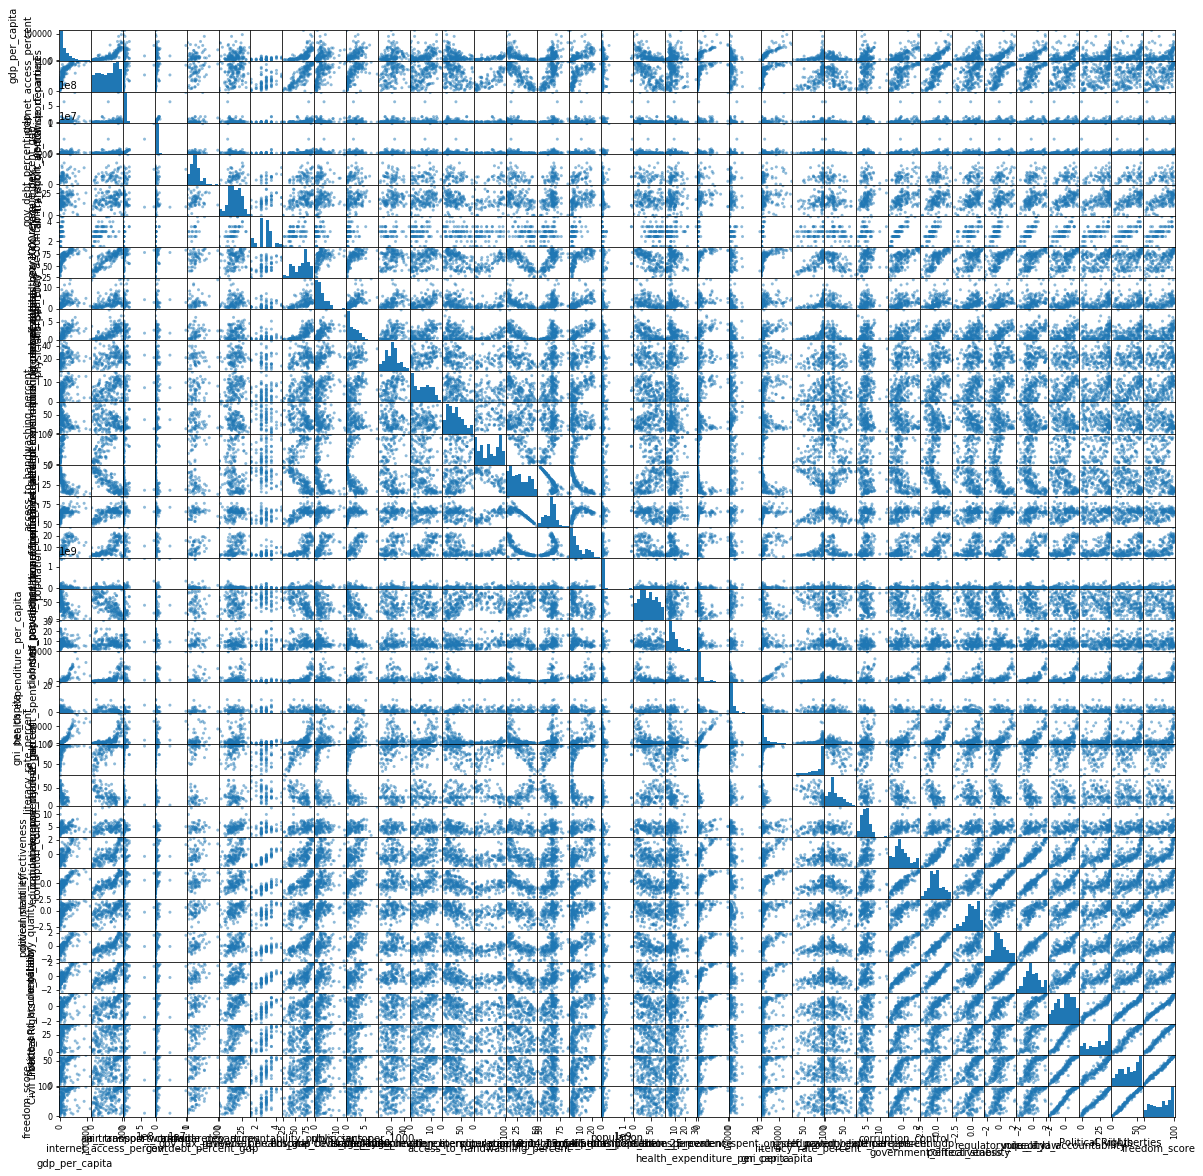

In [48]:
axes  = scatter_matrix(merged_press,figsize=(20,20))

In [52]:
for row in axes:
    for subplot in row:
        subplot.xaxis.set_tick_params(rotation=90)
#         plt.setp(subplot.get_yticklabels(), rotation=90)

In [ ]:
import matplotlib.pyplot as plt

In [54]:
axes.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'